In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.stats.proportion as proportion
import math
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare
import phik
from copy import deepcopy
import itertools
import collections

In [42]:
! pip install bootstrapped

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
! pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Check threw file

In [44]:
df = pd.read_csv('/content/Games csv.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [45]:
df.columns = df.columns.str.lower()

In [46]:
null_colls = df.columns[df.isna().any()]
null_colls

Index(['name', 'year_of_release', 'genre', 'critic_score', 'user_score',
       'rating'],
      dtype='object')

In [47]:
length = df.shape[0]

In [48]:
df.axes

[RangeIndex(start=0, stop=16715, step=1),
 Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
        'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
       dtype='object')]

In [49]:
df.memory_usage()

Index                 128
name               133720
platform           133720
year_of_release    133720
genre              133720
na_sales           133720
eu_sales           133720
jp_sales           133720
other_sales        133720
critic_score       133720
user_score         133720
rating             133720
dtype: int64

In [50]:
size = df.size

In [83]:
def custom_hist(df : pd.Series):
  fig = plt.figure(figsize = (7, 7))
  ax = fig.add_subplot()
  plt.hist(df, color = 'red', edgecolor = 'skyblue', bins = 20, density = True, label = 'hist')
  plt.axvline(df.mean(), color = 'blue', linestyle = 'dashed', linewidth = 2, label = 'average')
  plt.axvline(np.quantile(df, 0.25), color = 'pink', linestyle = 'dashed', linewidth = 2, label = '0.25Procentile')
  plt.axvline(np.quantile(df, 0.75), color = 'pink', linestyle = 'dashed', linewidth = 2, label = '0.75Procentile')
  df.plot.kde()
  plt.title('Histogram')
  plt.legend(loc = 'best')
  plt.xlabel('Values')
  plt.ylabel('Counter of values')
  plt.xticks(rotation = 45)
  plt.minorticks_on()
  plt.grid(which = 'minor', ls = '--', linewidth = 0.3)
  plt.grid(which = 'major', ls = ':', linewidth = 0.1)
  plt.show();

def describe_columns(df : pd.Series):
  print(f'Количество пропусков : {df.isna().mean()}')
  print(f'Тип данных : {df.dtypes}')
  print(f'Количество уникальных элементов {len(frozenset(list(df)))}')
  print(f'Is empty ? : {df.empty}')


In [52]:
# Name

In [53]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [54]:
describe_columns(df['name'])

Количество пропусков : 0.00011965300628178283
Тип данных : object
Количество уникальных элементов 11560
Is empty ? : False


In [57]:
df = df.loc[~df['name'].isnull()]

In [62]:
colls = ['na_sales', 'eu_sales',
       'jp_sales', 'other_sales']

df[colls].isna().mean()

na_sales       0.0
eu_sales       0.0
jp_sales       0.0
other_sales    0.0
dtype: float64

In [63]:
def create_result_sales(row):
  return row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']

In [67]:
df['result_sales'] = df.apply(create_result_sales, axis = 1)

In [69]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
result_sales       float64
dtype: object

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  result_sales     16713 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.2+ MB


# **Предобработка данных**

In [72]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,result_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [73]:
describe_columns(df['name'])

Количество пропусков : 0.0
Тип данных : object
Количество уникальных элементов 11559
Is empty ? : False


In [75]:
df.groupby('name')['result_sales'].agg(['count', 'sum']).sort_values('sum', ascending = False).reset_index()[:3]

,name,count,sum
0,Wii Sports,1,82.54
1,Grand Theft Auto V,5,56.58
2,Super Mario Bros.,2,45.31


In [76]:
# platform

In [78]:
describe_columns(df['platform'])

Количество пропусков : 0.0
Тип данных : object
Количество уникальных элементов 31
Is empty ? : False


In [81]:
t = df.groupby('platform')['result_sales'].agg(['count', 'sum']).sort_values(by = 'sum', ascending = False).reset_index()[:5]

In [82]:
t

,platform,count,sum
0,PS2,2161,1255.77
1,X360,1262,971.42
2,PS3,1331,939.65
3,Wii,1320,907.51
4,DS,2151,806.12


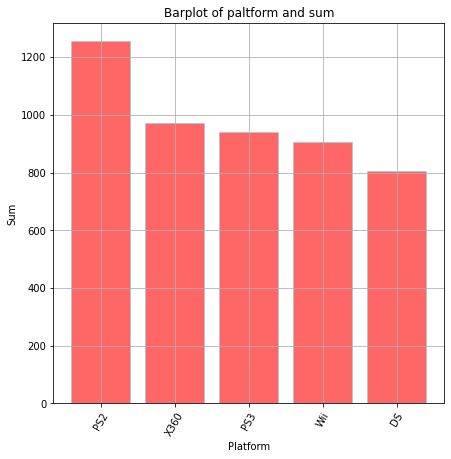

In [84]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot()
plt.bar(np.array(t['platform']), t['sum'], alpha = 0.6, color = 'red', edgecolor = 'skyblue', label = 'barplot')
plt.title('Barplot of paltform and sum')
plt.xlabel('Platform')
plt.ylabel('Sum')
plt.xticks(np.array(t['platform']),rotation = 60)
plt.grid()
plt.show();

In [85]:
# year_of_release

In [86]:
describe_columns(df['year_of_release'])

Количество пропусков : 0.016095255190570215
Тип данных : float64
Количество уникальных элементов 306
Is empty ? : False


In [87]:
df['year_of_release'].isna().sum()

269

In [88]:
269 / length * 100

1.609332934489979

In [90]:
df.loc[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,result_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,0.01
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


**Обработка пропусков year_of_release**

In [97]:
data = df.loc[df['year_of_release'].isnull()]
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,result_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53


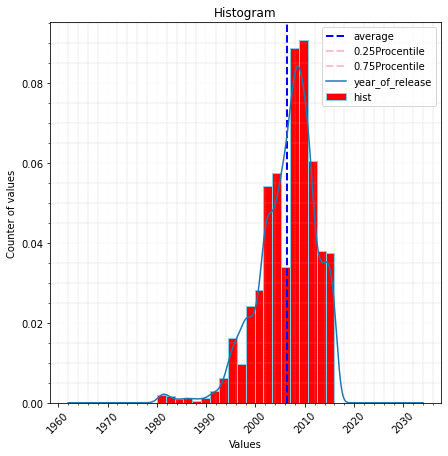

In [98]:
custom_hist(df['year_of_release'])

In [114]:
check_df = df.groupby('genre')['year_of_release'].agg(['median']).reset_index()
check_df['median'] = check_df['median'].astype('int64')
check_df.head()

,genre,median
0,Action,2009
1,Adventure,2009
2,Fighting,2005
3,Misc,2008
4,Platform,2004


In [115]:
data = data.merge(check_df, on = 'genre', how = 'inner')
data[:2]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,result_sales,median
0,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24,2006
1,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50,2006


In [105]:
df = df.loc[~df['year_of_release'].isnull()]
len(df)

16444

In [112]:
data = data.drop(['median_y', 'median_x', 'median_y'], axis = 1)

In [118]:
len(data)

269

In [122]:
df = pd.concat([df, data])

In [123]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,result_sales,median
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,NaN
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,NaN


In [124]:
df.loc[df['year_of_release'].isnull(), 'year_of_release'] = df.loc[df['year_of_release'].isnull(), 'median']
df['year_of_release'].isna().sum()

0

In [125]:
df = df.drop(['median'], axis = 1)

In [126]:
df['year_of_release'] = df['year_of_release'].astype('int64')

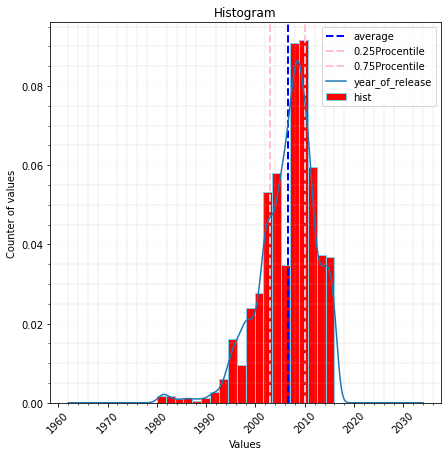

In [127]:
custom_hist(df['year_of_release'])

In [128]:
# genre

In [129]:
describe_columns(df['genre'])

Количество пропусков : 0.0
Тип данных : object
Количество уникальных элементов 12
Is empty ? : False


In [132]:
t = df.groupby('genre')['result_sales'].agg(['sum', 'count']).sort_values(by = 'sum', ascending = False).reset_index()

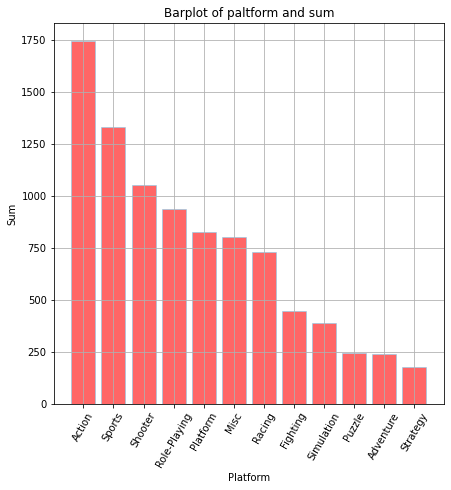

In [133]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot()
plt.bar(np.array(t['genre']), t['sum'], alpha = 0.6, color = 'red', edgecolor = 'skyblue', label = 'barplot')
plt.title('Barplot of paltform and sum')
plt.xlabel('Platform')
plt.ylabel('Sum')
plt.xticks(np.array(t['genre']),rotation = 60)
plt.grid()
plt.show();

In [134]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,result_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [135]:
# critic_score

In [136]:
describe_columns(df['critic_score'])

Количество пропусков : 0.5131334889008556
Тип данных : float64
Количество уникальных элементов 8658
Is empty ? : False


In [138]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


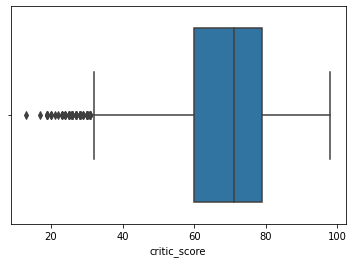

In [140]:
sns.boxplot(df['critic_score']);

In [142]:
df['critic_score'].mode()

0    70.0
dtype: float64

In [144]:
# user_score

In [146]:
describe_columns(df['user_score'])

Количество пропусков : 0.400825704541375
Тип данных : object
Количество уникальных элементов 97
Is empty ? : False


In [152]:
df.select_dtypes(include = 'object')

,name,platform,genre,user_score,rating
0,Wii Sports,Wii,Sports,8,E
1,Super Mario Bros.,NES,Platform,NaN,NaN
2,Mario Kart Wii,Wii,Racing,8.3,E
3,Wii Sports Resort,Wii,Sports,8,E
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,NaN,NaN
...,...,...,...,...,...
264,Chou Soujuu Mecha MG,DS,Simulation,NaN,NaN
265,Mobile Ops: The One Year War,X360,Simulation,NaN,NaN
266,Majesty 2: The Fantasy Kingdom Sim,X360,Simulation,NaN,NaN
267,Combat Wings: The Great Battles of WWII,Wii,Simulation,NaN,NaN


In [154]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [156]:
df = df.loc[df['user_score'] != 'tbd']
df['user_score'] = df['user_score'].astype('float64')
describe_columns(df['user_score'])

Количество пропусков : 0.46882217090069284
Тип данных : float64
Количество уникальных элементов 6794
Is empty ? : False


In [157]:
# result_sales

In [158]:
describe_columns(df['result_sales'])

Количество пропусков : 0.0
Тип данных : float64
Количество уникальных элементов 1000
Is empty ? : False


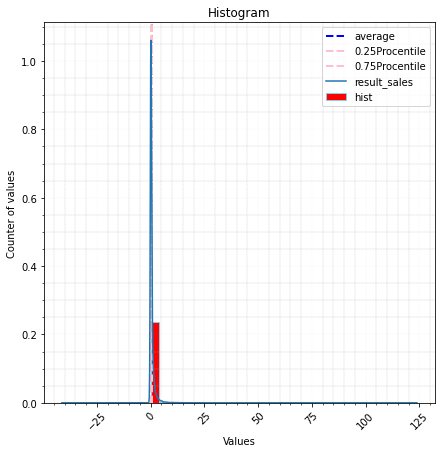

In [159]:
custom_hist(df['result_sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


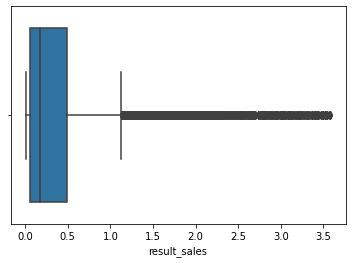

In [163]:
sns.boxplot(df.loc[df['result_sales'].between(np.quantile(df['result_sales'], 0.025), np.quantile(df['result_sales'], 0.975))]['result_sales'])

In [164]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,result_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


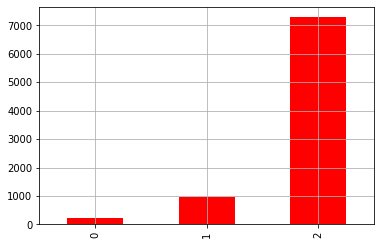

In [167]:
df['intervals'] = pd.qcut(df['result_sales'], 3, labels = ['cheap', 'med', 'exp'])
df.groupby('intervals')['result_sales'].agg(['count', 'sum']).reset_index()['sum'].plot(kind = 'bar', color = 'red', grid = True)

In [169]:
data = df.loc[(~df['critic_score'].isnull()) & (~df['user_score'].isnull())]
len(data)

7017

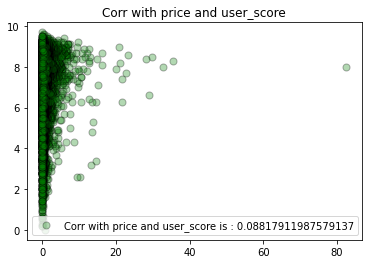

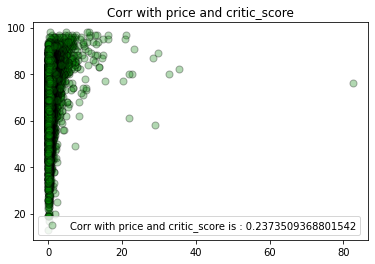

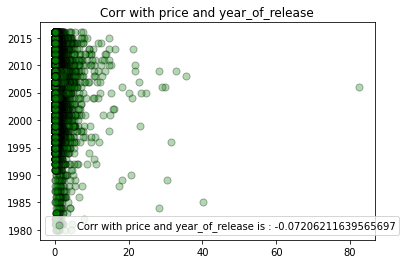

In [171]:
columns_for_correlation = ['user_score', 'critic_score', 'year_of_release']

for correlation in columns_for_correlation:
  fig = plt.figure()
  ax = fig.add_subplot()
  cor = df['result_sales'].corr(df[correlation])
  plt.scatter(df['result_sales'], df[correlation], s = 50, c = 'green', edgecolor = 'black', alpha = 0.3, label = f'Corr with price and {correlation} is : {cor}')
  plt.title(f'Corr with price and {correlation}')
  plt.legend(loc = 'best')
  plt.show();

In [173]:
df[['critic_score', 'user_score', 'result_sales']].phik_matrix()

interval columns not set, guessing: ['critic_score', 'user_score', 'result_sales']


,critic_score,user_score,result_sales
critic_score,1.000000,0.648751,0.136181
user_score,0.648751,1.000000,0.000000
result_sales,0.136181,0.000000,1.000000


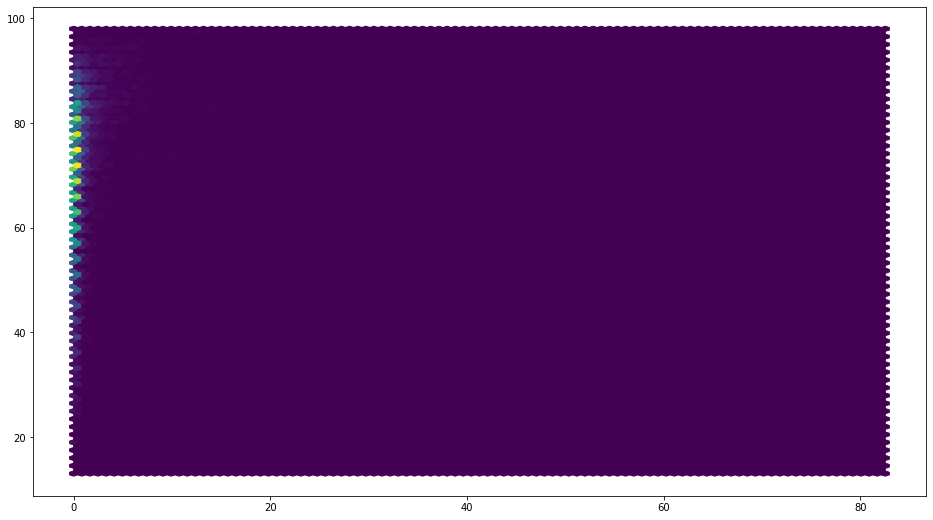

In [176]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot()
plt.hexbin(df['result_sales'], df['critic_score'])
plt.show();

In [177]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,result_sales,intervals
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,exp
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,exp
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,exp
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,exp
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,exp


In [183]:
df = df.drop(['intervals'], axis =  1)

# Проверка гипотез

In [184]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,result_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Гипотеза 1: Средний пользовательский рейтинг между жанрами Sports and Action Equals - Равны**

H0) -> Пусть рейтинги этих жанров ранвы
H1) -> Пусть рейтинги этих жанров не ранвы(то есть статистически значимы)

In [185]:
alpha = 0.01

In [186]:
data = df.loc[~df['user_score'].isnull()]
len(data)

7590

In [188]:
action = data.loc[data['genre'] == 'Action']
sport = data.loc[data['genre'] == 'Sports']

In [194]:
def two_histograms(df1 : pd.Series, df2 : pd.Series):
  fig = plt.figure(figsize = (16, 9))
  ax = fig.add_subplot()
  plt.hist(df1, color = 'orange', edgecolor = 'skyblue', bins = 20, label ='First DF', alpha = 0.5)
  plt.axvline(df1.mean(), color = 'red', linestyle = 'dashed', linewidth = 2, label = 'avg First DF')
  plt.axvline(df2.mean(), color = 'red', linestyle = 'dashed', linewidth = 2, label = 'avg Second DF')
  plt.hist(df2, color = 'blue', edgecolor  = 'red', bins = 20, label = 'Second DF', alpha = 0.5)
  plt.grid()
  plt.legend(loc = 'best')
  plt.show()

In [190]:
len(action)

1830

In [191]:
len(sport)

1103

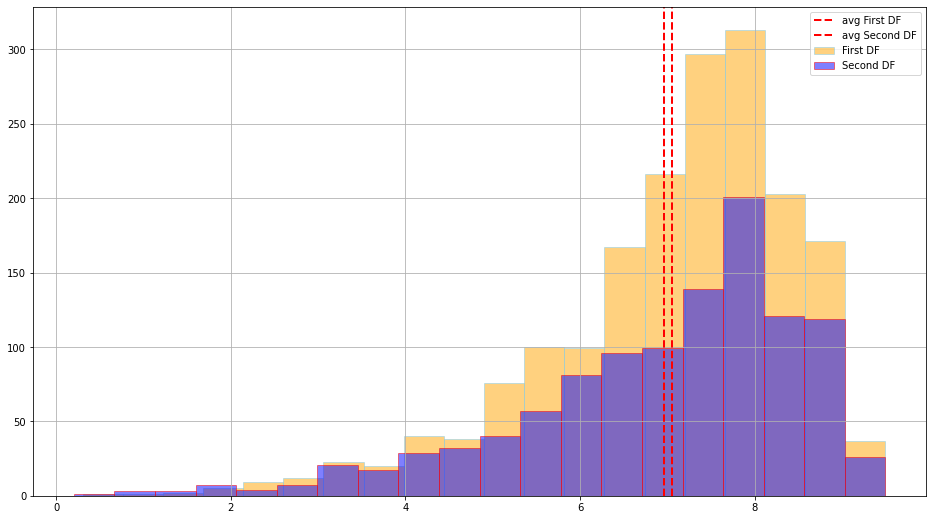

In [203]:
two_histograms(action['user_score'], sport['user_score']) # Бимодальное расрпделение - Normalnoe

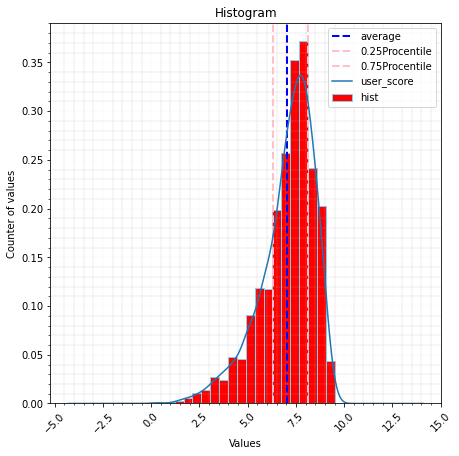

In [200]:
custom_hist(action['user_score'])

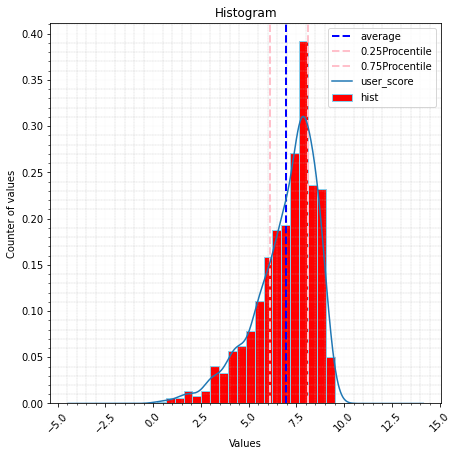

In [202]:
custom_hist(sport['user_score'])# ttest ind

In [204]:
statistics, pvalue = scipy.stats.shapiro(action['user_score'])

pvalue > alpha

False

In [205]:
statistics, pvalue = scipy.stats.shapiro(sport['user_score'])

pvalue > alpha

False

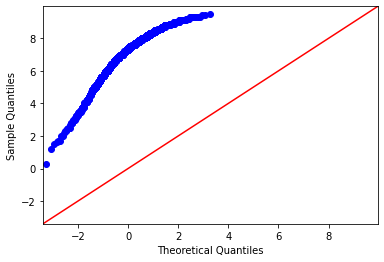

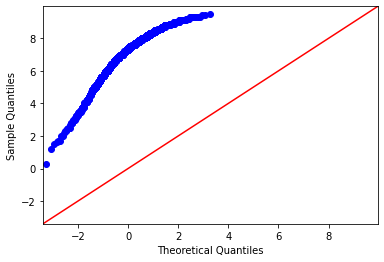

In [207]:
sm.qqplot(action['user_score'], line = '45')

In [209]:
statistics, pvalue = scipy.stats.levene(action['user_score'], sport['user_score'])

print(f'Pvalue is {pvalue}')

Pvalue is 0.0001736640672727649


In [212]:
import random as rn
def generate_bootstrap(first_col : pd.Series, second_col : pd.Series):
 
  length_first_col = first_col.shape[0]
  length_second_col = second_col.shape[0]
  first_col = list(first_col)
  second_col = list(second_col)
  result_stack = []
  for _ in range(10 ** 4):
    stack = []
    for _ in range(length_first_col // 2):
      random = rn.randint(0, length_first_col - 1)
      stack += [first_col[random]]
    
    stack = pd.Series(stack)
    result_stack += [np.var(stack)]
 
  second_result = []
  for _ in range(10 ** 4):
    stack = []
    for _ in range(length_second_col // 2):
      random = rn.randint(0, length_second_col - 1)
      stack += [second_col[random]]
    
    stack = pd.Series(stack)
    second_result += [np.var(stack)]
  return pd.Series(result_stack) - pd.Series(second_result)

In [222]:
arr_vars = generate_bootstrap(action['user_score'], sport['user_score'])

In [223]:
left = np.mean(arr_vars) - 2 * np.std(arr_vars)
right = np.mean(arr_vars) + 2 * np.std(arr_vars)
plt.style.use('dark_background')

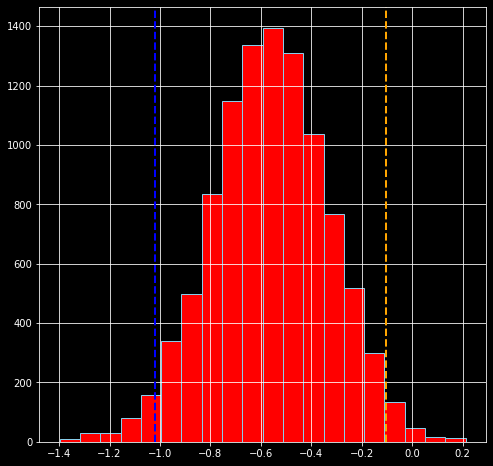

In [224]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()
plt.hist(arr_vars, bins = 20, color = 'red', edgecolor = 'skyblue', label = 'hist')
plt.axvline(left, linestyle = 'dashed', linewidth = 2, color = 'blue')
plt.axvline(right, linestyle = 'dashed', linewidth = 2, color = 'orange')
plt.grid()
plt.show();

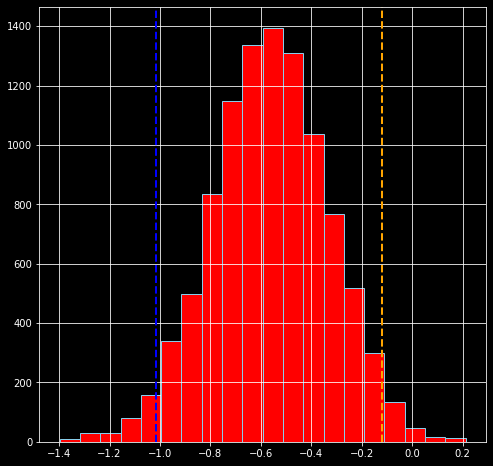

In [226]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()
plt.hist(arr_vars, bins = 20, color = 'red', edgecolor = 'skyblue', label = 'hist')
plt.axvline(np.quantile(arr_vars, 0.025), linestyle = 'dashed', linewidth = 2, color = 'blue')
plt.axvline(np.quantile(arr_vars, 0.975), linestyle = 'dashed', linewidth = 2, color = 'orange')
plt.grid()
plt.show();

In [227]:
statistics, pvalue = scipy.stats.ttest_ind(action['user_score'], sport['user_score'])

print(f'Pvalues if {pvalue}')

if pvalue > alpha:
  print(f'Нет оснований отвергать нулевую гипотезу')
else:
  print('Отвергаем нулевую гипотезу')

Pvalues if 0.10406951359049807
Нет оснований отвергать нулевую гипотезу


In [229]:
statistics, pvalue = scipy.stats.mannwhitneyu(action['user_score'], sport['user_score'])

print(f'Pvalues if {pvalue}')

if pvalue > alpha:
  print(f'Нет оснований отвергать нулевую гипотезу')
else:
  print('Отвергаем нулевую гипотезу')

Pvalues if 0.3590516668584349
Нет оснований отвергать нулевую гипотезу


In [230]:
import random as rn
def generate_bootstrap_mean(first_col : pd.Series, second_col : pd.Series):
 
  length_first_col = first_col.shape[0]
  length_second_col = second_col.shape[0]
  first_col = list(first_col)
  second_col = list(second_col)
  result_stack = []
  for _ in range(10 ** 4):
    stack = []
    for _ in range(length_first_col // 2):
      random = rn.randint(0, length_first_col - 1)
      stack += [first_col[random]]
    
    stack = pd.Series(stack)
    result_stack += [stack.mean()]
 
  second_result = []
  for _ in range(10 ** 4):
    stack = []
    for _ in range(length_second_col // 2):
      random = rn.randint(0, length_second_col - 1)
      stack += [second_col[random]]
    
    stack = pd.Series(stack)
    second_result += [stack.mean()]
  return pd.Series(result_stack) - pd.Series(second_result)

In [231]:
arr_vars = generate_bootstrap_mean(action['user_score'], sport['user_score'])

In [232]:
left = np.mean(arr_vars) - 2 * np.std(arr_vars)
right = np.mean(arr_vars) + 2 * np.std(arr_vars)
plt.style.use('dark_background')

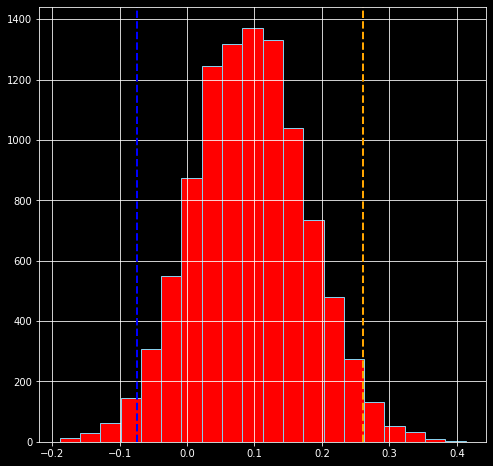

In [233]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()
plt.hist(arr_vars, bins = 20, color = 'red', edgecolor = 'skyblue', label = 'hist')
plt.axvline(left, linestyle = 'dashed', linewidth = 2, color = 'blue')
plt.axvline(right, linestyle = 'dashed', linewidth = 2, color = 'orange')
plt.grid()
plt.show();

In [236]:
result = bs.bootstrap_ab(action['user_score'].values, sport['user_score'].values, stat_func = bs_stats.mean, compare_func = bs_compare.difference, return_distribution=True)
result[:10]

array([-0.02868912,  0.11927193,  0.13499081,  0.05916229, -0.02534142,
        0.15084791,  0.11249201,  0.1146022 ,  0.08252877,  0.0444725 ])

In [237]:
left = np.mean(result) - 2 * np.std(result)
right = np.mean(result) + 2 * np.std(result)
plt.style.use('dark_background')

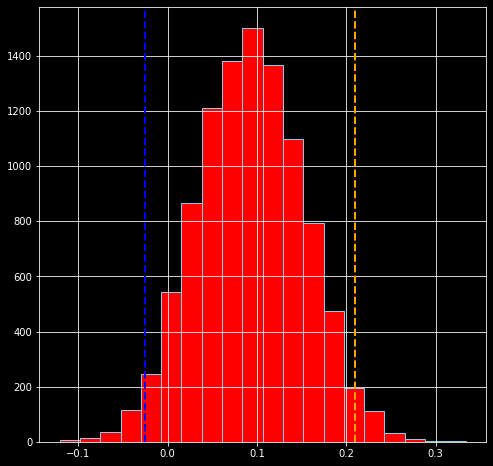

In [239]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()
plt.hist(result, bins = 20, color = 'red', edgecolor = 'skyblue', label = 'hist')
plt.axvline(left, linestyle = 'dashed', linewidth = 2, color = 'blue')
plt.axvline(right, linestyle = 'dashed', linewidth = 2, color = 'orange')
plt.grid()
plt.show();

In [240]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,result_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**За 2006 и 2007 год пользовательский рейтинг отличался(средний)**

H0) -> Пусть рейтинги за эти 2 года не отличаются
H1) -> Рейтинги за эти 2 года статистически различаются

In [241]:
data = df.loc[~df['user_score'].isnull()]

In [242]:
year_2006 = data.loc[data['year_of_release'] == 2006]
year_2007 = data.loc[data['year_of_release'] == 2007]

In [247]:
len(year_2006)

574

In [249]:
len(year_2007)

657

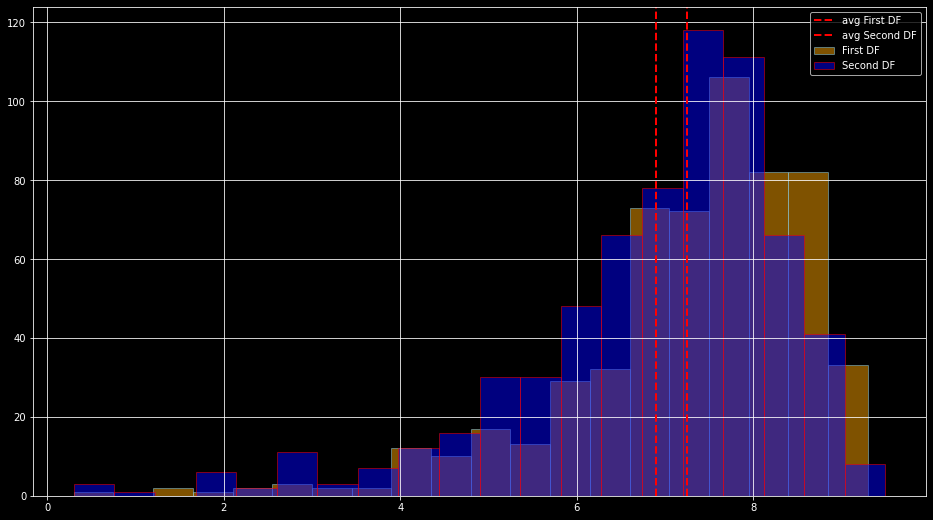

In [250]:
two_histograms(year_2006['user_score'], year_2007['user_score'])

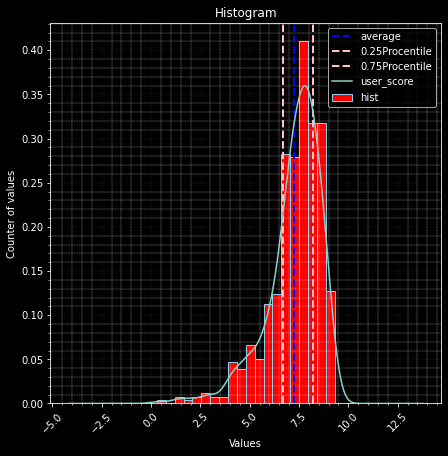

In [251]:
custom_hist(year_2006['user_score'])

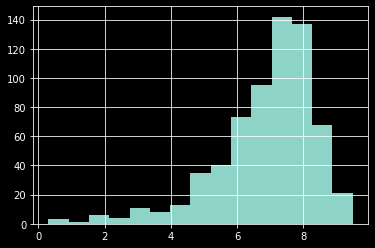

In [257]:
year_2007['user_score'].hist(bins = 15)

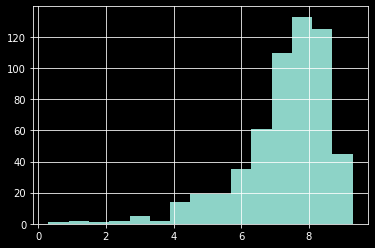

In [258]:
year_2006['user_score'].hist(bins = 15)

In [255]:
table, pvalue = scipy.stats.shapiro(year_2007['user_score'])
pvalue > 0.01

False

In [256]:
table, pvalue = scipy.stats.shapiro(year_2006['user_score'])
pvalue > 0.01

False

In [259]:
statistics, pvalue = scipy.stats.fligner(year_2006['user_score'] , year_2007['user_score'])

print(f'Pvalue is {pvalue}')

Pvalue is 0.07885233354404894


In [264]:
arr_var = generate_bootstrap(year_2006['user_score'] , year_2007['user_score'])

In [265]:
left = np.mean(arr_var) - 2 * np.std(arr_var)
left = np.mean(arr_var) + 2 * np.std(arr_var)

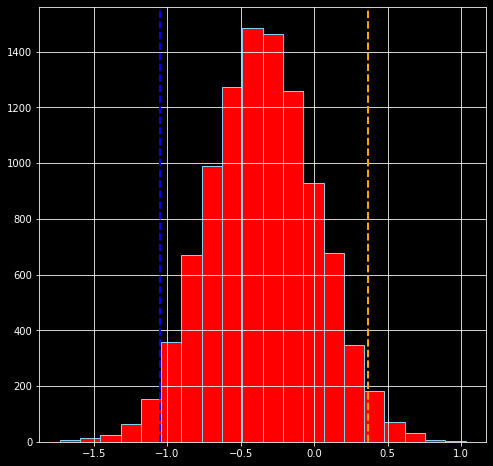

In [267]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()
plt.hist(arr_var, bins = 20, color = 'red', edgecolor = 'skyblue', label = 'hist')
plt.axvline(np.quantile(arr_var, 0.025), linestyle = 'dashed', linewidth = 2, color = 'blue')
plt.axvline(np.quantile(arr_var, 0.975), linestyle = 'dashed', linewidth = 2, color = 'orange')
plt.grid()
plt.show();

In [268]:
statistics, pvalue = scipy.stats.ttest_ind(year_2006['user_score'], year_2007['user_score'])

print(f'Pvalue is {pvalue}')

if pvalue > alpha:
  print(f'Нет смысла отвергать нулевую гипотезу ')
else:
  print(f'Отвергаем нулевую гипотезу')

Pvalue is 1.4395269754526125e-05
Отвергаем нулевую гипотезу


In [270]:
statistics, pvalue = scipy.stats.mannwhitneyu(year_2006['user_score'], year_2007['user_score'])

print(f'Pvalue is {pvalue}')

if pvalue > alpha:
  print(f'Нет смысла отвергать нулевую гипотезу ')
else:
  print(f'Отвергаем нулевую гипотезу')

Pvalue is 1.0044459705247888e-06
Отвергаем нулевую гипотезу
